# Simulazione d'esame Laboratorio di Programmazione 2

## Esercizio 1

1. Crea un vettore NumPy con i seguenti **canoni mensili d'affitto** (in euro) per 4 appartamenti: **720, 980, 650, 1200**

2. Calcola la **spesa totale mensile** sostenuta dagli inquilini.

3. Il proprietario dell'appartamento da **1200 €** decide di **aumentare l’affitto del 12%**.
    - Modifica il vettore per applicare l’aumento.
    - L’importo aggiornato deve essere esattamente **1344,00 €**, controlla se appare **esattamente** nel tuo array.


4. L'inquilino dell'appartamento da **650 €** ottiene uno **sconto del 10%**.
    - Applica la modifica.

5. Gli altri due appartamenti (**720 € e 980 €**) subiscono un **aumento del 5%**.
    - Aggiorna il vettore di conseguenza.

7. Calcola la **nuova spesa totale mensile** dopo tutti i cambiamenti.

8. Infine: quanto ha influito **l’aumento dell’affitto più alto** sulla spesa complessiva?

    (Suggerimento: confronta la spesa totale **prima di qualsiasi modifica** e **dopo il solo aumento del canone a 1200 €**.)


In [3]:
import numpy as np

#Creazione array tramite numpy
cash = np.array([720, 980, 650, 1200], dtype=float)

#1-Calcolo e stampo la spesa totale degli inquilini
spesa_tot = cash.sum()
print(spesa_tot)

#2-Si vuole modificare il prezzo dell'inquilino che paga 1200 con incremnto del 12%
cash[cash==1200] *= 1.12

#Verifico la presenza di 1344,00 nell'array
val_presente=np.isclose(cash, 1344.00).any()
print("Valore presente: ", val_presente)
sum_fst = cash.sum()
print("Spesa mensile aggiornata: ", sum_fst)

# 4 - inquilino da 650 ottiene uno sconto del 10%
cash[cash==650] *= 0.9
print("Spesa mensile aggiornata: ", cash.sum())

#5 - calcolo aumento appartamenti restanti
cash[np.isin(cash, [720,980])] *=1.05
print("Spesa mensile aggiornata: ", cash.sum())

#7 - Calcolo influenza del primo aumento rispetto al maggiore aumento
print("Influito influenza aumento 12%: ", sum_fst-spesa_tot)


3550.0
Valore presente:  True
Spesa mensile aggiornata:  3694.0
Spesa mensile aggiornata:  3629.0
Spesa mensile aggiornata:  3714.0
Influito influenza aumento 12%:  144.0


## Esercizio 2

Consideriamo un semplice processo di random walk (cammino aleatorio) in una dimensione:
a ogni passo temporale, un camminatore si sposta a destra (+1) o a sinistra (-1) con uguale probabilità. Supponiamo che il camminatore parta sempre da x=0.

1. Scrivi una funzione che simula il cammino per n passi ed N camminatori e restituisce due array. Il primo rappresenta la media della posizione ad ogni passo degli N camminatori ed il secondo la deviazione standard della posizione ad ogni passo degli N camminatori.

2. Fai prima il plot della media delle posizione degli N camminatori per 100 passi 

3. Fai il plot con anche la devizione standard.  La deviazione standard diminuisce all'aumentare del campione? Che andamento ha la deviazione standard rispeto l tempo/passi?

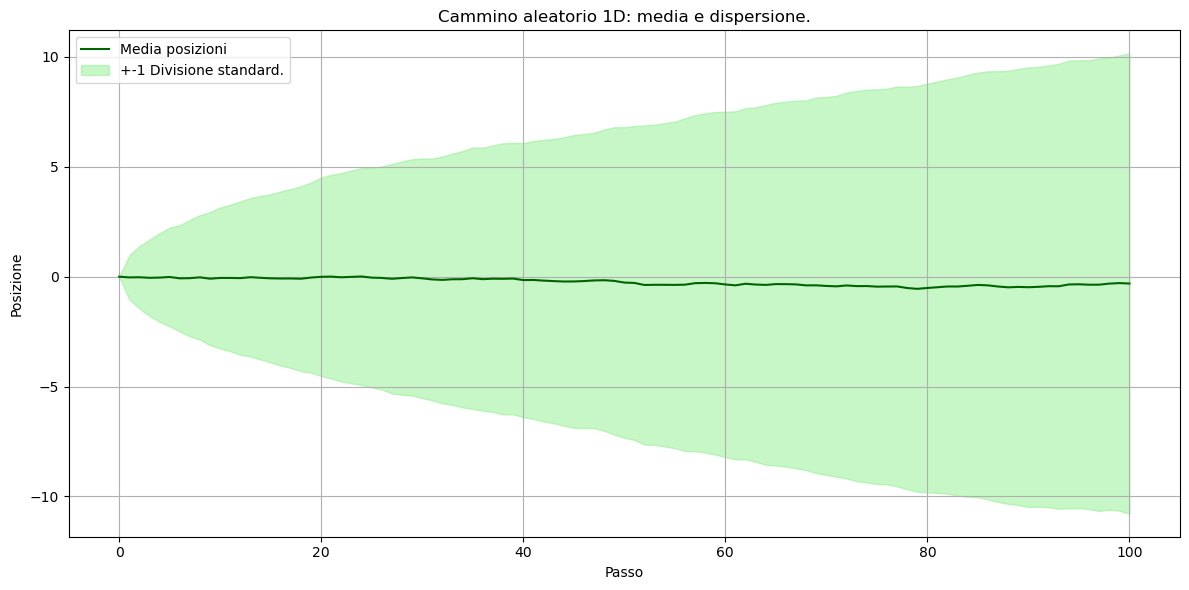

In [46]:
import matplotlib.pyplot as plt


# 1 - Funzione che simula il cammino
def cammino(N, step):
    passi = np.random.choice([-1,1], size=(N, step))
    posizioni = np.hstack((np.zeros((N,1), dtype=int), np.cumsum(passi, axis=1)))

    media = posizioni.mean(axis=0)
    var = posizioni.std(axis=0)

    return media, var


camminatori = 1000
step = 100

media_pos, var_pos = cammino(camminatori, step)

#Stampare a video il grafico della varianza e media in un unico plot
plt.figure(figsize=(12,6))
plt.plot(media_pos, label="Media posizioni", color='darkgreen')
obj = plt.fill_between(range(len(media_pos)), media_pos - var_pos, media_pos+var_pos,
                       color = "lightgreen", alpha=0.5, label="+-1 Divisione standard.")

plt.title("Cammino aleatorio 1D: media e dispersione.")
plt.xlabel("Passo")
plt.ylabel("Posizione")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

    

## Esercizio 3

Genera un array `a` di dimensioni **5 x 9** contenente numeri da una distribuzione gaussiana con media 0 e dev standard 1.  
Per ogni riga, seleziona il numero **più vicino a 0.1**.
Imposta il seed per la riproducibilità `np.random.seed(42)`

 *Suggerimento*: per ottenere `a[i, j]`, l'array `i` deve contenere gli **indici di riga** corrispondenti agli elementi in `j`.


In [75]:
np.random.seed(42) # Imposto il seed a 42

array_gauss = np.random.normal(loc=0, scale=1, size=(5,9)) #Generato array

righe = np.arange(array_gauss.shape[0]) #Ritorna un array con gli indici di riga
distanze = np.abs(array_gauss-0.1)
colonne = np.argmin(distanze, axis=1)

valori_vicini = array_gauss[righe, colonne]

print(valori_vicini)


[-0.1382643   0.24196227  0.11092259 -0.01349722  0.17136828]


## Esercizio 4

Utilizza il dataset `titanic`, disponibile all'url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

Esegui un’analisi esplorativa sui dati dei passeggeri, focalizzandoti su tariffe, età e componenti familiari.

1. **Visualizza i primi 10 passeggeri ordinati per tariffa pagata** (`Fare`), dal più alto al più basso.

2. **Calcola la media** di:
   - `Age` (età)
   - `Fare` (tariffa)
   - `SibSp` (numero di fratelli/coniugi a bordo)

3. **Crea una nuova colonna** chiamata `Family_index`, definita come:

   $$
   \texttt{family\_index} = \frac{\texttt{sibsp} + \texttt{parch}}{\texttt{fare}}
   $$

   *(Indicatore del “peso familiare” per unità di spesa – attenzione a eventuali divisioni per zero!)*

4. Trova il **passeggero con il valore massimo** di `Family_index`.

5. **Filtra solo i passeggeri** che hanno pagato **più di 100** di tariffa (`Fare > 100`).

6. **Crea un grafico a barre** con i 10 passeggeri che hanno pagato di più (`Fare`).

7. **Crea un grafico a linee** dell’età (`Age`), ordinando i passeggeri per tariffa (`Fare`) crescente.



💡 *Suggerimenti*:
- Ricordati di gestire eventuali valori mancanti in `Age` o `Fare` prima di fare operazioni.


Età media:  29.7
Costo medio:  32.2
Fratelli a bordo medio:  0.52
PassengerId                                  69
Survived                                      1
Pclass                                        3
Name            Andersson, Miss. Erna Alexandra
Sex                                      female
Age                                        17.0
SibSp                                         4
Parch                                         2
Ticket                                  3101281
Fare                                      7.925
Cabin                                       NaN
Embarked                                      S
family_index                           0.757098
Name: 68, dtype: object


C:\Users\Media\AppData\Local\Temp\ipykernel_26480\455760286.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe[col].fillna(dataframe[col].mean(), inplace=True)


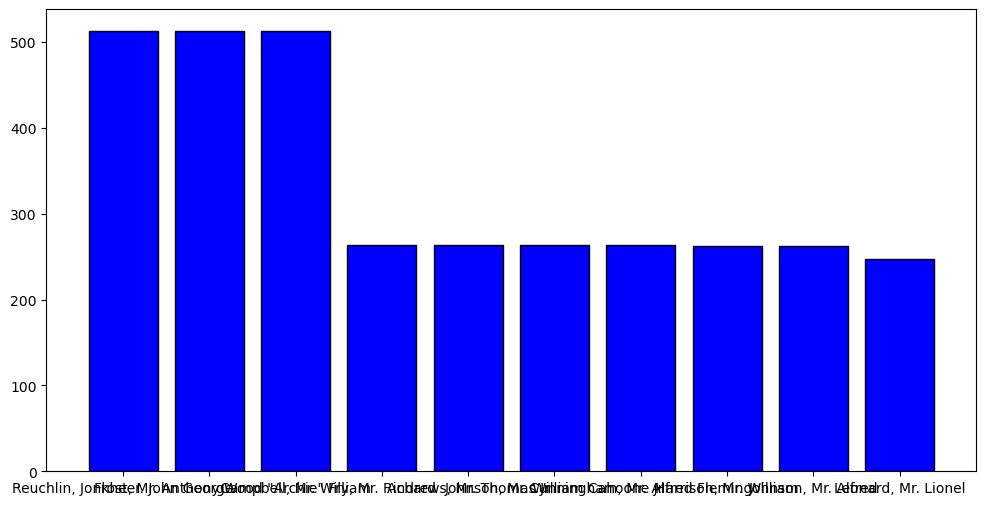

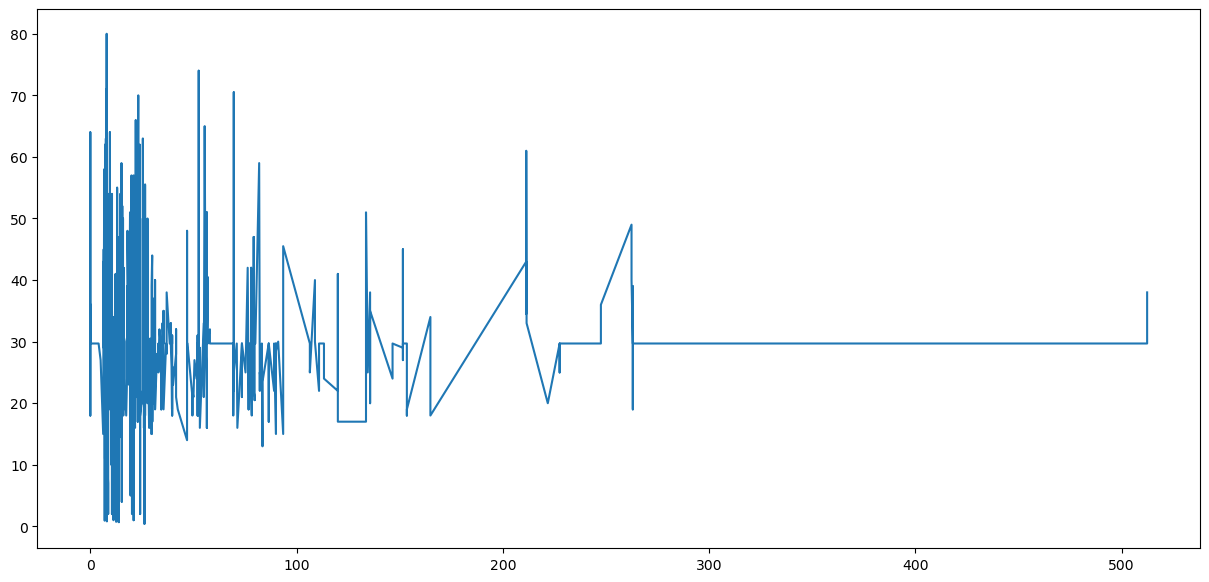

In [44]:
import seaborn as sns
import pandas as pd

#Carico il dataset in memoria
dataframe = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")


#1 - Devo verificare se ci sono valori NaN
#Restituisce i valori della dimensione X della tabella, le righe - 1 le colonne
nc = len(dataframe.axes[0])

for col in dataframe.select_dtypes(include=[np.number]).columns:
    dataframe[col].fillna(dataframe[col].mean(), inplace=True)

dataframe = dataframe.sort_values(by="Fare", ascending=False)
dataframe.head(10)

#2-Calcolo le medie
avarege_age = np.round(dataframe["Age"].mean(), 2)
print("Età media: ", avarege_age)
cost = np.round(dataframe["Fare"].mean(), 2)
print("Costo medio: ", cost)
sib = np.round(dataframe["SibSp"].mean(),2)
print("Fratelli a bordo medio: ", sib)

#3-Creazione nuova colonna family_index
dataframe["family_index"] = (dataframe["SibSp"]+dataframe["Parch"])/dataframe["Fare"]
#print(dataframe.iloc[:,-1].values)

#4-Trovare il passeggero col numero massimo di family_index
riga_max = dataframe.loc[dataframe["family_index"].idxmax()]
print(riga_max)

#5-Filtro passeggeri che hanno pagato più di un limite
dn = dataframe[dataframe["Fare"]>100].sort_values('Fare',ascending=False)
names = dataframe.sort_values('Fare')["Name"]

#6 - creo grafico a barre per i 10 passeggeri che hanno pagato maggiormente
figure = plt.figure(figsize=(12,6))
plt.bar(names.head(10) ,dn["Fare"].head(10), color='blue', edgecolor='black')
plt.show()

#7 - Si vuole creare un grafico a linee che rappresenta Age e Fare
ordered = dataframe["Fare"].sort_values(ascending=False)
ages = dataframe.sort_values('Fare')["Age"]

f1 = plt.figure(figsize=(15,7))
plt.plot(ordered, ages)
plt.show()

## Esercizio 5

Usa il dataset `penguins`, disponibile tramite `seaborn.load_dataset("penguins")`.


1. Quante righe e colonne ha il dataset?

2. Controlla quanti valori mancanti ci sono per colonna.

3. Riempi i valori mancanti nella colonna `sex` con il valore più frequente.

4. Rimuovi le righe in cui il valore `body_mass_g` è mancante.

5. Controlla se ci sono righe duplicate.

6. Calcola la **massa corporea media** (`body_mass_g`) per ogni specie (`species`).
  Se ci sono valori mancanti in `body_mass_g`, riempili con la media della specie.

7. Visualizza la **distribuzione della massa corporea** (`body_mass_g`) per specie.

8.  Visualizza la **distribuzione della massa corporea** per specie, **dividendo per sesso** (`sex`) e mostrandoli a confronto.


💡 Suggerimento: usa `seaborn.violinplot()`, `boxplot()` o `kdeplot()` con `hue='sex'`.


(344, 7)
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
0


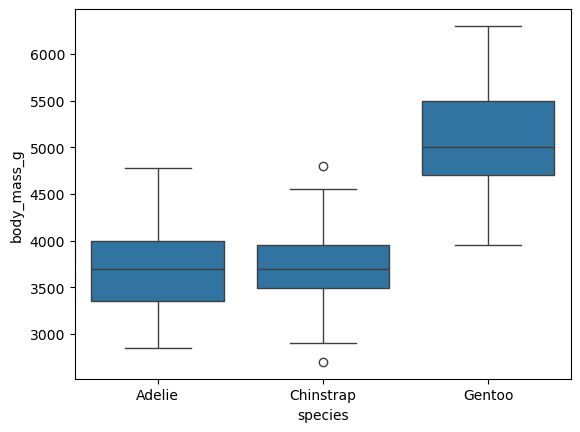

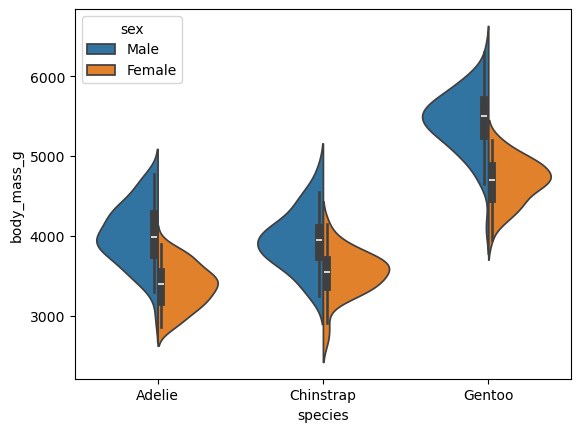

In [79]:
#Carico il dataset
df = sns.load_dataset("penguins")

#1 - Stampo il numero di righe e colonne del dataframe caricato
print(df.shape) # ritorna una tupla (righe, colonne)

#2 - Controllo numero di dati mancanti per colonna
print(df.isna().sum())

#3 - Riempire i valori mancanti in sex con il valore più frequente
df["sex"] = df["sex"].fillna(df["sex"].mode().max())

#4 - Riempiio i valori rimuovo le righe della colonna body_mass_g con valori np.Nan
df = df.dropna(subset="body_mass_g")

#5 - Controllo se ci sono righe duplicate
print(df.duplicated().sum())

#6 - Calcola la media corporea body_mass_g per ciascuna specie, quindi si applica un 
#       calcolo della media per gruppi in base alla specie

a = df.groupby('species')["body_mass_g"].mean()

#7 - Mostro il grafico della distribuzione per specie mediante seaborn
sns.boxplot(data=df, x='species', y='body_mass_g')
plt.show()

#8 - Visualizzo la distribuzione della massa corporea per specie dividendo per sesso
sns.violinplot(data=df, x='species', hue='sex', y='body_mass_g', split=True)
plt.show()

## Esercizio 6

Hai due array NumPy generati come segue:

`x = np.linspace(0, 10, 100)`  
`y = 3 * x + 2 + np.random.normal(0, 1, 100)`

Scrivi una funzione `fit_line(x, y)` che:

- usa `scipy.optimize.curve_fit` per eseguire un **fitting lineare** del tipo `y = a * x + b`;  
- restituisce una tupla contenente:
  - i **parametri ottimizzati** `a` e `b`;  
  - una **stringa** che descrive la retta trovata, ad esempio: `"y = 3.02 * x + 1.95"`.


Esempio di output atteso:   (3.02, 1.95, "y = 3.02 * x + 1.95")

Fai un esempio di utilizzo dove poi plotti i dati e la curva ottenuta.


(np.float64(3.029565249919213), np.float64(1.6866940627766758), 'y = 3.03 * x + 1.69')


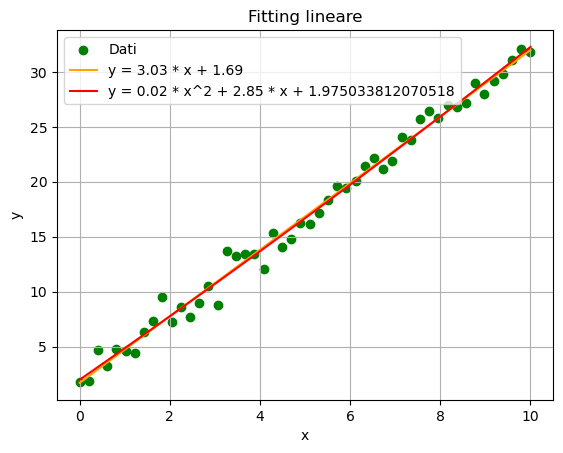

In [93]:
from scipy.optimize import curve_fit

x = np.linspace(0,10,50)
y = 3*x+2+np.random.normal(0,1,50)

def model_linear(x, a, b):
    return a * x + b

def parabola(x, a, b, c):
    return a * x**2 + b*x +c

def fit_line(x, y):
    popt, pcov = curve_fit(model_linear, x, y)

    a, b = popt

    stringa = f"y = {a:.2f} * x + {b:.2f}"

    return a, b, stringa

def fit_curve(x, y):
    popt, pcov = curve_fit(parabola, x, y)
    a, b, c = popt
    stringa = f"y = {a:.2f} * x^2 + {b:.2f} * x + {c}"

    return a, b, c, stringa

a, b, stringa = fit_line(x, y)
print((a, b, stringa))

a1, b1, c, stringa1 = fit_curve(x,y)

#Grafico dei dati e della curva
plt.scatter(x , y, label='Dati', color='green')
plt.plot(x, a*x+b, label=stringa, color='orange')
plt.plot(x, a1*x**2+b1*x+c, label = stringa1, color="red")
plt.legend()
plt.title("Fitting lineare")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


